### Which ML-algorithms are used?
### Multiclass classification problem 
Logistische Regression (LogisticRegression)<br>
Support Vector Classification (SVC)<br>
Random Forest (RandomForestClassifier)<br>
KNeighborsClassifier (Knn)<br>
Gaussian Naive Bayes (GaussianNB)<br>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

###  Dataset
Iris from sklearn <br>
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

k=10 #Number of Folds

kf = KFold(n_splits=k, shuffle=True, random_state=29) #7 
#skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)


### Show fold distribution

In [3]:
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold + 1}")
    print("Train Index:", train_index)
    print("Test Index:", test_index)
    print()

Fold 1
Train Index: [  0   1   3   4   5   6   7   8   9  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  88  89  90  92  93  94  95  96
  97  98  99 101 102 103 104 105 108 109 110 112 113 114 115 116 117 118
 119 120 122 123 124 126 127 128 129 130 131 132 133 134 135 136 138 139
 140 141 142 143 144 145 146 148 149]
Test Index: [  2  10  53  70  71  87  91 100 106 107 111 121 125 137 147]

Fold 2
Train Index: [  0   1   2   3   4   5   6   7   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  69  70  71  73  74  75
  76  77  78  79  80  81  82  83  84  86  87

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, f1_score

In [5]:
logreg = LogisticRegression(solver='liblinear')
svc = SVC(kernel='rbf', C=1.0, gamma='scale')
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()

In [6]:
f1_weighted_scorer = make_scorer(f1_score, average='weighted')

## Code for Accuracy
logreg_cross_val_scores = cross_val_score(logreg, X, y, cv=kf, scoring='accuracy').mean()
svc_cross_val_scores = cross_val_score(svc, X, y, cv=kf, scoring='accuracy').mean()
rf_classifier_cross_val_scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring='accuracy').mean()
knn_cross_val_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy').mean()
gnb_cross_val_scores = cross_val_score(gnb, X, y, cv=kf, scoring='accuracy').mean()


In [7]:
logreg_cross_val_scores = cross_val_score(logreg, X, y, cv=kf, scoring=f1_weighted_scorer).mean()
svc_cross_val_scores = cross_val_score(svc, X, y, cv=kf, scoring=f1_weighted_scorer).mean()
rf_classifier_cross_val_scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring=f1_weighted_scorer).mean()
knn_cross_val_scores = cross_val_score(knn, X, y, cv=kf, scoring=f1_weighted_scorer).mean()
gnb_cross_val_scores = cross_val_score(gnb, X, y, cv=kf, scoring=f1_weighted_scorer).mean()

In [8]:
cross_val_scores = {
    'Logistic Regression': logreg_cross_val_scores,
    'Support Vector Classifier': svc_cross_val_scores,
    'Random Forest Classifier': rf_classifier_cross_val_scores,
    'K-Nearest Neighbors': knn_cross_val_scores,
    'Gaussian Naive Bayes': gnb_cross_val_scores
}

sorted_cross_val_scores = sorted(cross_val_scores.items(), key=lambda x: x[1], reverse=True)

for i, (model, score) in enumerate(sorted_cross_val_scores, start=1):
    rounded_score = round(score, 3)
    print(f"{i}. {model}: {rounded_score}")

1. Support Vector Classifier: 0.967
2. Logistic Regression: 0.967
3. K-Nearest Neighbors: 0.966
4. Random Forest Classifier: 0.961
5. Gaussian Naive Bayes: 0.955


In [9]:
import matplotlib.pyplot as plt

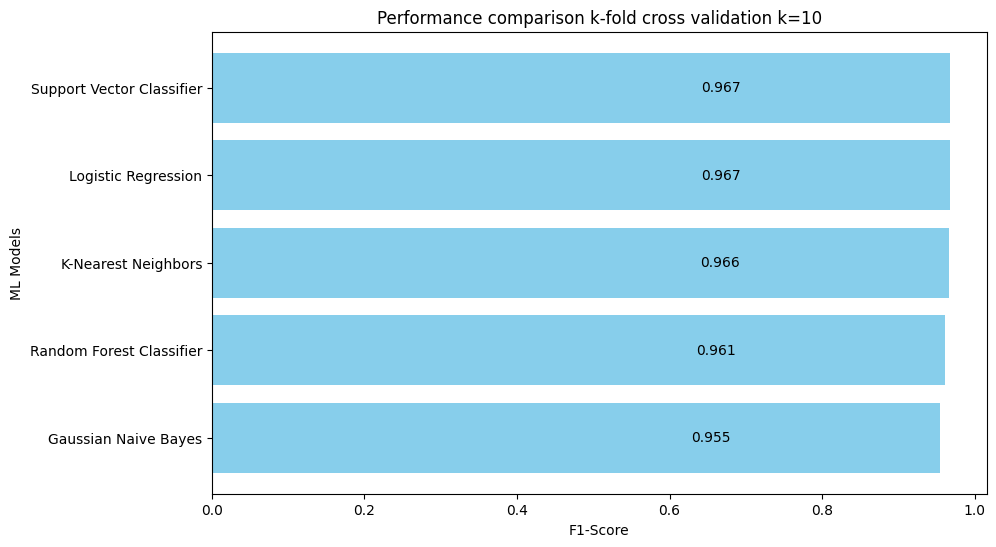

In [10]:
models = [model for model, _ in sorted_cross_val_scores]
scores = [score for _, score in sorted_cross_val_scores]

# Erstellt das Balkendiagramm
plt.figure(figsize=(10, 6))
bars = plt.barh(models, scores, color='skyblue')
plt.xlabel('F1-Score')
plt.ylabel('ML Models')
plt.title('Performance comparison k-fold cross validation k=10')
for bar, score in zip(bars, scores):
    plt.text(bar.get_width() - 0.3, bar.get_y() + bar.get_height()/2, f'{score:.3f}', 
             va='center', ha='center', color='black')

plt.gca().invert_yaxis()  
plt.show()

In [11]:
from sklearn.model_selection import cross_validate

The following variant does exactly the same thing, except that we now have the option of executing individual actions after each iteration.

In [12]:
all_fold_scores = {model: [] for model in ['Logistic Regression', 'Support Vector Classifier', 'Random Forest Classifier', 'K-Nearest Neighbors', 'Gaussian Naive Bayes']}
placement_history = {model: [] for model in all_fold_scores.keys()}
mean_scores_history = {model: [] for model in all_fold_scores.keys()}  

for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
    print(f"Fold {fold_idx}:")
    
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    logreg.fit(X_train, y_train)
    svc.fit(X_train, y_train)
    rf_classifier.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    gnb.fit(X_train, y_train)

    #Accuracy Score
    #logreg_score = logreg.score(X_test, y_test)
    #svc_score = svc.score(X_test, y_test)
    #rf_classifier_score = rf_classifier.score(X_test, y_test)
    #knn_score = knn.score(X_test, y_test)
    #gnb_score = gnb.score(X_test, y_test)

    logreg_score = f1_score(y_test, logreg.predict(X_test),average='weighted')
    svc_score = f1_score(y_test, svc.predict(X_test),average='weighted')
    rf_classifier_score = f1_score(y_test, rf_classifier.predict(X_test),average='weighted')
    knn_score = f1_score(y_test, knn.predict(X_test),average='weighted')
    gnb_score = f1_score(y_test, gnb.predict(X_test),average='weighted')
    
    all_fold_scores['Logistic Regression'].append(logreg_score)
    all_fold_scores['Support Vector Classifier'].append(svc_score)
    all_fold_scores['Random Forest Classifier'].append(rf_classifier_score)
    all_fold_scores['K-Nearest Neighbors'].append(knn_score)
    all_fold_scores['Gaussian Naive Bayes'].append(gnb_score)

    cross_val_scores_actual_fold = {
        'Logistic Regression': logreg_score,
        'Support Vector Classifier': svc_score,
        'Random Forest Classifier': rf_classifier_score,
        'K-Nearest Neighbors': knn_score,
        'Gaussian Naive Bayes': gnb_score
    }
    
    sorted_cross_val_scores_actual_fold = sorted(cross_val_scores_actual_fold.items(), key=lambda x: x[1], reverse=True)

    for i, (model, score) in enumerate(sorted_cross_val_scores_actual_fold, start=1):
        rounded_score = round(score, 3)
        print(f"{i}. {model}: {rounded_score}")

    mean_scores = {model: np.mean(scores) for model, scores in all_fold_scores.items()}
    sorted_mean_scores = sorted(mean_scores.items(), key=lambda x: x[1], reverse=True)

    print()  

    for i, (model, mean_score) in enumerate(sorted_mean_scores, start=1):
        print(f"{i}. Average for {model} after {fold_idx} Folds: {round(mean_score, 3)}")
        placement_history[model].append(i)
        mean_scores_history[model].append(round(mean_score, 3)) 
        
    print()


Fold 1:
1. Support Vector Classifier: 0.934
2. Logistic Regression: 0.932
3. Random Forest Classifier: 0.867
4. K-Nearest Neighbors: 0.867
5. Gaussian Naive Bayes: 0.867

1. Average for Support Vector Classifier after 1 Folds: 0.934
2. Average for Logistic Regression after 1 Folds: 0.932
3. Average for Random Forest Classifier after 1 Folds: 0.867
4. Average for K-Nearest Neighbors after 1 Folds: 0.867
5. Average for Gaussian Naive Bayes after 1 Folds: 0.867

Fold 2:
1. Logistic Regression: 1.0
2. Support Vector Classifier: 1.0
3. Random Forest Classifier: 0.934
4. Gaussian Naive Bayes: 0.934
5. K-Nearest Neighbors: 0.932

1. Average for Support Vector Classifier after 2 Folds: 0.967
2. Average for Logistic Regression after 2 Folds: 0.966
3. Average for Random Forest Classifier after 2 Folds: 0.9
4. Average for Gaussian Naive Bayes after 2 Folds: 0.9
5. Average for K-Nearest Neighbors after 2 Folds: 0.899

Fold 3:
1. Logistic Regression: 1.0
2. Support Vector Classifier: 1.0
3. Random 

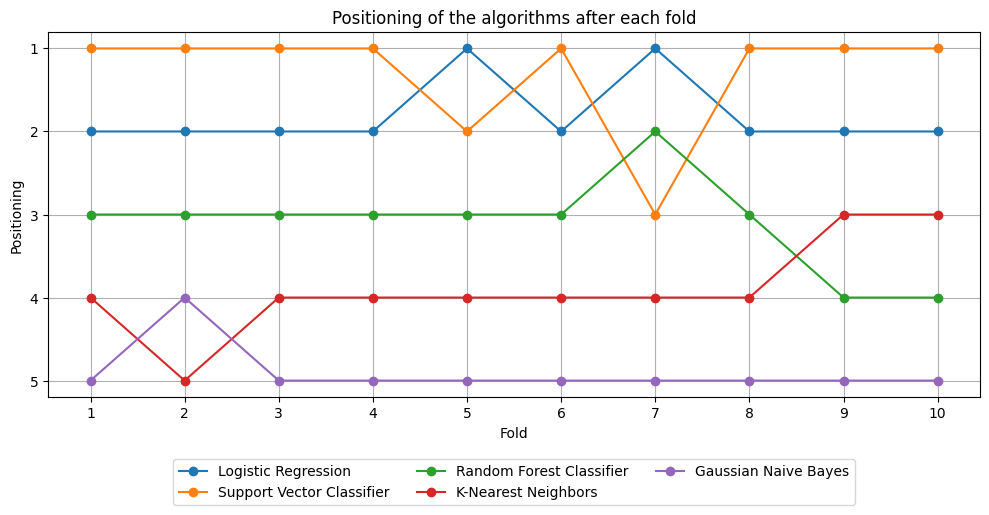

In [13]:
plt.figure(figsize=(10, 6))
for model, placements in placement_history.items():
    plt.plot(range(1, len(placements) + 1), placements, marker='o', label=model)

plt.gca().invert_yaxis()  
plt.xticks(range(1, kf.get_n_splits() + 1))
plt.yticks(range(1, max(max(placements) for placements in placement_history.values()) + 1))  

plt.xlabel('Fold')
plt.ylabel('Positioning')
plt.title('Positioning of the algorithms after each fold')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.9])  
plt.show()


In [14]:
import scipy.stats as stats
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [16]:
acc_rf = mean_scores_history['Random Forest Classifier']
acc_lr = mean_scores_history['Logistic Regression']
acc_gnb = mean_scores_history['Gaussian Naive Bayes']
acc_knn = mean_scores_history['K-Nearest Neighbors']
acc_svc = mean_scores_history['Support Vector Classifier']

best_model_name = sorted_cross_val_scores[0][0]

if best_model_name == 'Random Forest Classifier':
    acc_best = acc_rf
elif best_model_name == 'Logistic Regression':
    acc_best = acc_lr
elif best_model_name == 'Gaussian Naive Bayes':
    acc_best = acc_gnb
elif best_model_name == 'K-Nearest Neighbors':
    acc_best = acc_knn
elif best_model_name == 'Support Vector Classifier':
    acc_best = acc_svc


def find_earliest_significant_fold_ttest(acc_best, acc):
    for i in range(len(acc_best)):
        t_stat, p_value = ttest_ind(acc_best[:i+1], acc[:i+1],alternative='greater')  
                                                                                
        if p_value < 0.05: 
            return i+1, p_value
    return None, None

def find_earliest_significant_fold_manwhitneyu(acc_best, acc):
    for i in range(len(acc_best)):
        t_stat, p_value = mannwhitneyu(acc_best[:i+1], acc[:i+1],alternative='greater')  
                                                                                
        if p_value < 0.05: 
            return i+1, p_value
    return None, None

algorithms = {
    'Logistic Regression': acc_lr,
    'Gaussian Naive Bayes': acc_gnb,
    'K-Nearest Neighbors': acc_knn,
    'Support Vector Classifier': acc_svc,
    'Random Forest Classifier': acc_rf
}
print("T-Test:")
for algo_name, acc in algorithms.items():
    if acc_best != acc:
        fold, p_value = find_earliest_significant_fold_ttest(acc_best, acc)
        if fold:
            print(f"{best_model_name}  is significantly better than {algo_name} from Fold {fold} (p-Wert: {p_value:.4f})")
        else:
            print(f"{best_model_name} is not significantly better than {algo_name} within 10 folds.")

print("Mann-Whitney-U-Test:")
for algo_name, acc in algorithms.items():
    if acc_best != acc:
        fold, p_value = find_earliest_significant_fold_manwhitneyu(acc_best, acc)
        if fold:
            print(f"{best_model_name} is significantly better than {algo_name} from Fold {fold} (p-Wert: {p_value:.4f})")
        else:
            print(f"{best_model_name} is not significantly better than {algo_name} within 10 folds.")


T-Test:
Support Vector Classifier is not significantly better than Logistic Regression within 10 folds.
Support Vector Classifier  is significantly better than Gaussian Naive Bayes from Fold 3 (p-Wert: 0.0132)
Support Vector Classifier  is significantly better than K-Nearest Neighbors from Fold 2 (p-Wert: 0.0495)
Support Vector Classifier  is significantly better than Random Forest Classifier from Fold 3 (p-Wert: 0.0322)
Mann-Whitney-U-Test:
Support Vector Classifier is not significantly better than Logistic Regression within 10 folds.
Support Vector Classifier is significantly better than Gaussian Naive Bayes from Fold 4 (p-Wert: 0.0286)
Support Vector Classifier is significantly better than K-Nearest Neighbors from Fold 4 (p-Wert: 0.0286)
Support Vector Classifier is significantly better than Random Forest Classifier from Fold 4 (p-Wert: 0.0407)


### **Evaluation**

The results can be evaluated in three ways:<br>
1.interpretation of the diagram <br>
2.Statistical significance using t-tests<br>
3. statistical significance using the Mann-Whitney U-test<br>
<br>
1st In this data set, we can only say with certainty in the **diagram** from the **8 fold** that Support Vector Classifier is the best algorithm.<br>
2-3.using the **T-test** and the **Mann-Whitney-U-test** we cannot say significantly that Support Vector Classifier is better in comparison with Logistic Regression.